In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importação de Dataset de Filmes e de Avaliações

In [2]:
movies_df = pd.read_csv('Movies/IMDb movies.csv', low_memory=False)

In [3]:
ratings_df = pd.read_csv('Movies/IMDb ratings.csv')

## Dataset Filmes

### Remoção Colunas

In [4]:
movies_df.drop(columns=(['title', 'language', 'writer'] + list(movies_df.columns[13:])), inplace=True)

## Dataset Avaliações

### Remoção Colunas

In [5]:
(movies_df['imdb_title_id'] == ratings_df['imdb_title_id']).value_counts()

True    85855
Name: imdb_title_id, dtype: int64

In [6]:
drop_columns = (['imdb_title_id', 'weighted_average_vote', 'median_vote'] 
                + list(ratings_df.columns[16:23:2]) + list(ratings_df.columns[26:33:2]) 
                + list(ratings_df.columns[36:43:2]) + list(ratings_df.columns[43:]))

In [7]:
ratings_df.drop(columns=drop_columns, inplace=True)

In [8]:
ratings_df.fillna(0, inplace=True)

## Concatenando os dois datasets em apenas um

In [9]:
rated_movies_df = pd.concat([movies_df, ratings_df], axis=1, 
                     verify_integrity=True)

In [10]:
rated_movies_df.dropna(inplace=True)

In [11]:
rated_movies_df.head(5)

,imdb_title_id,original_title,year,date_published,genre,duration,country,director,production_company,actors,...,males_0age_avg_vote,males_18age_avg_vote,males_30age_avg_vote,males_45age_avg_vote,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_18age_avg_vote,females_30age_avg_vote,females_45age_avg_vote
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",...,7.0,5.9,5.6,6.7,6.0,35.0,7.3,5.9,5.7,4.5
1,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",...,6.0,6.2,6.0,6.2,6.2,50.0,0.0,5.9,6.2,6.6
2,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",Urban Gad,Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",...,0.0,5.5,5.9,6.2,5.7,15.0,0.0,5.8,5.8,6.8
3,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,Charles L. Gaskill,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",...,0.0,5.2,4.9,5.2,5.9,39.0,0.0,5.7,5.5,6.1
4,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,"Francesco Bertolini, Adolfo Padovan",Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",...,8.0,7.0,7.0,7.0,7.2,215.0,7.0,7.0,7.3,7.4


## Analise dos Dados

##### Perguntas:
1. Quais os filmes mais bem avaliados?
2. Quais as produtoras que têm maiores médias?
3. Quais os gêneros mais bem avaliados?
4. Quais os diretores mais bem avaliados?
5. Quais os países mais produziram filmes?
6. Correlação entre métricas e nota média
7. Correlação entre gêneros e idade
8. Duração dos filmes ao longo do tempo 
9. Quais os filmes brasileiros mais bem avaliados?

In [13]:
def company_mean(company):
    company_df = rated_movies_df[rated_movies_df.production_company == company]
    company_notes_qnt = company_df.loc[:,'votes_1':'votes_10':-1].sum().values
    company_total_votes = company_df.total_votes.sum()
    
    sum = 0
    for i in range (len(company_notes_qnt)):
        sum += (i + 1) * company_notes_qnt[i]
    
    return round((sum / company_total_votes), 1)

In [14]:
movies_by_company = rated_movies_df.production_company.value_counts()
companies_dict = {}

for company in movies_by_company.index:
    if movies_by_company[company] > 100:
        if rated_movies_df[rated_movies_df.production_company == company].sum()['total_votes'] > 10000:
            companies_dict[company] = [company_mean(company)]

In [15]:
companies_df = pd.DataFrame.from_dict(companies_dict, orient='index')

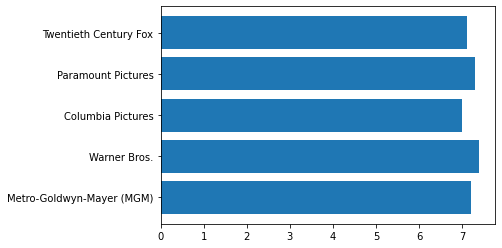

In [32]:
plt.barh(list(companies_df.index)[:5], list(companies_df[0].values)[:5]);

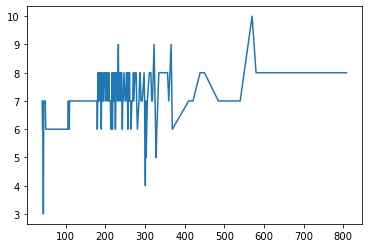

In [49]:
x = list(round(rated_movies_df.groupby(['duration']).mean()['mean_vote']).index)
y = list(round(rated_movies_df.groupby(['duration']).mean()['mean_vote']).values)
plt.plot(x, y);

In [77]:
rated_movies_df.loc[:,"original_title":"mean_vote"].sort_values('duration', ascending=False)

,original_title,year,date_published,genre,duration,country,director,production_company,actors,total_votes,mean_vote
85057,La flor,2016,2018-09-21,"Drama, Fantasy, Musical",808,Argentina,Mariano Llinás,El Pampero Cine,"Elisa Carricajo, Valeria Correa, Pilar Gamboa,...",473,7.5
38038,"Out 1, noli me tangere",1971,2015-11-18,"Drama, Mystery",729,France,"Jacques Rivette, Suzanne Schiffman",Sunchild Productions,"Michèle Moretti, Hermine Karagheuz, Karen Puig...",1126,7.8
39346,Khleb - imya sushchestvitelnoe,1988,1988-10-06,"Drama, History, Romance",580,Soviet Union,Grigori Nikulin,Kirov Theatre Symphony Orchestra,"Nikolai Voloshin, Andrey Dudarenko, Sergey Nik...",157,7.6
54835,Orbius,2020,2020-01-16,Fantasy,570,Russia,Sergey A.,Terra Studio,"Sergey A., Random People",225,9.5
50674,Heremias: Unang aklat - Ang alamat ng prinsesa...,2006,2006-11-03,"Crime, Drama",540,"Philippines, Netherlands, Sweden",Lav Diaz,Sine Olivia,"Ronnie Lazaro, Jordan, Sid Lucero, Dante Baloi...",131,7.2
...,...,...,...,...,...,...,...,...,...,...,...
73576,Alpha and Omega 4: The Legend of the Saw Tooth...,2014,2014-10-07,"Animation, Action, Adventure",45,"USA, India",Richard Rich,Crest Animation Productions,"Kate Higgins, Ben Diskin, Debi Derryberry, Mar...",358,5.8
54562,My Little Pony: Equestria Girls - Holidays Unw...,2019,2019-11-02,"Animation, Comedy, Family",44,"USA, Canada","Katrina Hadley, Ishi Rudell",Allspark Animation,"Ashleigh Ball, Andrea Libman, Rebecca Shoichet...",102,3.2
3966,Niagara Falls,1941,1941-10-17,"Comedy, Romance",43,USA,Gordon Douglas,Hal Roach Studios,"Marjorie Woodworth, Tom Brown, Zasu Pitts, Sli...",185,6.0
57390,Enigma,2009,2010-12-10,Sci-Fi,42,USA,"Jason Shumway, Matt Shumway",Frontier Studios,"Nadia Salamanca, Ventura Alvarez, Iris Corliss...",232,5.6


In [66]:
rated_movies_df

,imdb_title_id,original_title,year,date_published,genre,duration,country,director,production_company,actors,...,males_0age_avg_vote,males_18age_avg_vote,males_30age_avg_vote,males_45age_avg_vote,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_18age_avg_vote,females_30age_avg_vote,females_45age_avg_vote
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",...,7.0,5.9,5.6,6.7,6.0,35.0,7.3,5.9,5.7,4.5
1,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",...,6.0,6.2,6.0,6.2,6.2,50.0,0.0,5.9,6.2,6.6
2,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",Urban Gad,Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",...,0.0,5.5,5.9,6.2,5.7,15.0,0.0,5.8,5.8,6.8
3,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,Charles L. Gaskill,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",...,0.0,5.2,4.9,5.2,5.9,39.0,0.0,5.7,5.5,6.1
4,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,"Francesco Bertolini, Adolfo Padovan",Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",...,8.0,7.0,7.0,7.0,7.2,215.0,7.0,7.0,7.3,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",Ludovic Colbeau-Justin,Monkey Pack Films,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",...,6.0,5.6,5.3,5.2,6.0,26.0,0.0,6.2,5.7,5.0
85851,tt9911196,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,Johan Nijenhuis,Johan Nijenhuis & Co,"Herman Finkers, Johanna ter Steege, Leonie ter...",...,0.0,7.6,7.6,7.9,7.6,109.0,0.0,7.4,8.0,7.3
85852,tt9911774,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Vineesh Aaradya,RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",...,0.0,1.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
85853,tt9914286,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Ahmet Faik Akinci,Gizem Ajans,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",...,0.0,6.5,1.8,1.0,4.0,2.0,0.0,0.0,0.0,7.0
